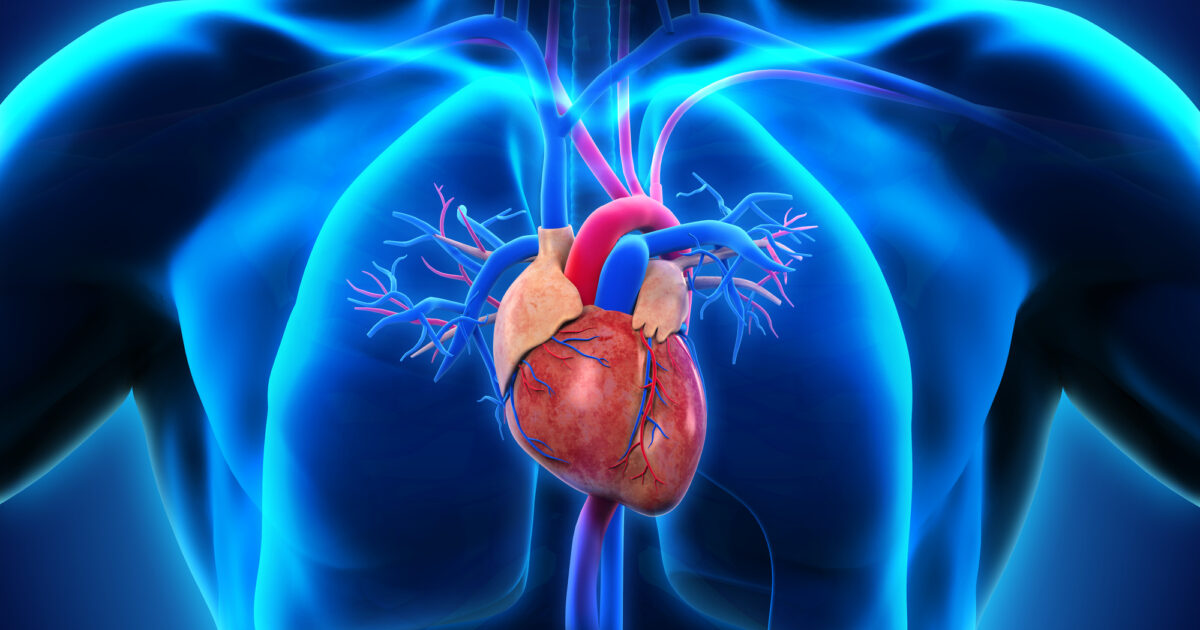
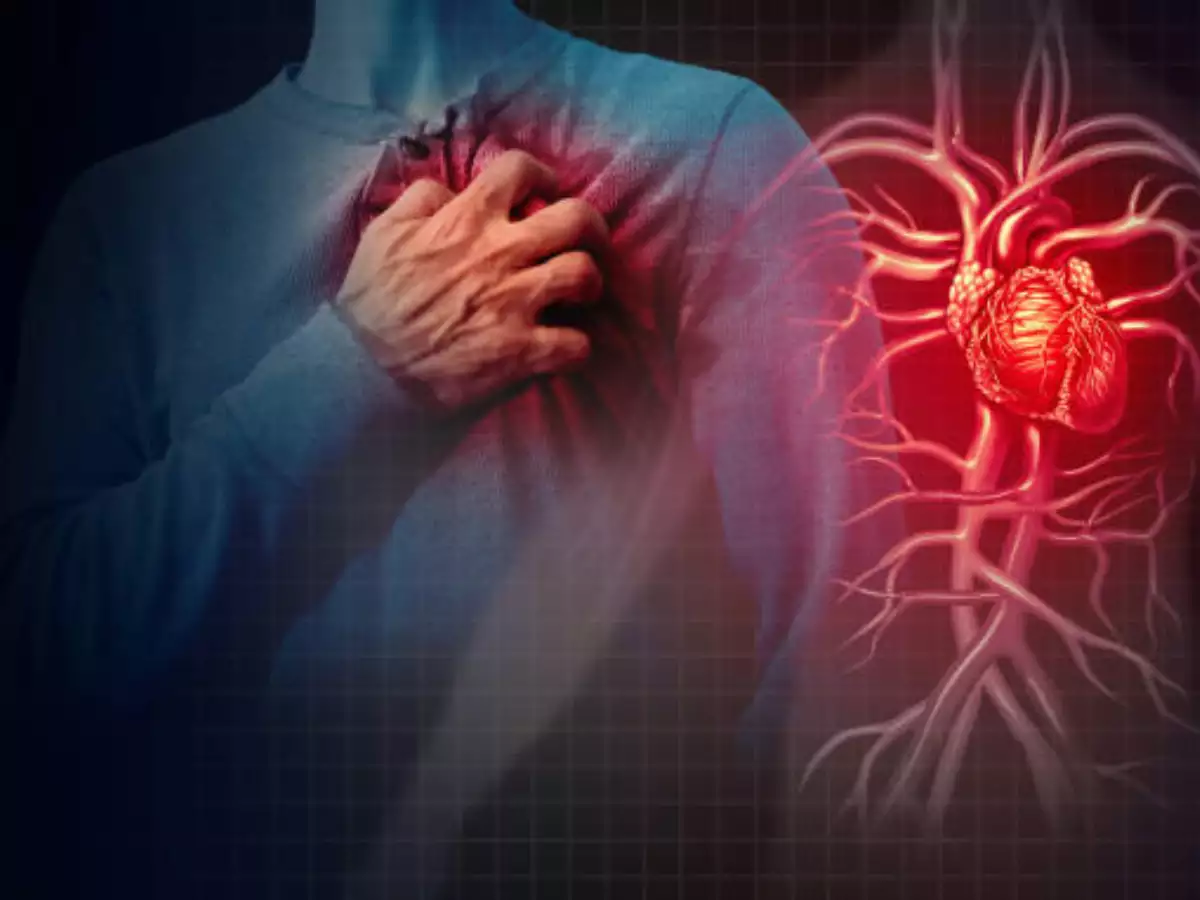

# **Heart Disease Statistical Analysis & Prediction Through Machine Learning**


### **Introduction**
Cardiovascular diseases (CVDs) represent a significant global health challenge, necessitating a holistic understanding to mitigate their impact. This project embodies a comprehensive analysis derived from the integration of datasets procured from two distinct sources: Kaggle, a renowned data science community, and the IEEE database, renowned for scholarly contributions. The objective is to discern nuanced insights into CVDs by amalgamating diverse data repositories, conducting rigorous data preprocessing, exploratory analyses, machine learning, and hyperparameter tuning.

### **Data Merging**
To utilize information from both sources effectively, I needed to merge the datasets into a single, comprehensive source. However, since these datasets had variations in their structures and formats, merging them required a few adjustments. I had to ensure compatibility by aligning column names or modifying data types to make the datasets harmonious for integration. This process allowed for a seamless merger, enabling me to proceed with a unified dataset for thorough data analysis and exploration."

### **Data Preprocessing**

Before diving into analyzing the dataset, I meticulously cleaned it. This involved rectifying errors, removing incomplete or unreliable information, and handling repeated or duplicated entries. By cleaning the dataset, I ensured it was accurate and consistent for analysis.

### **Data Analysis & Visualization**
Data analysis and visualization are important because they allow us to make sense of large and complex datasets. In today's data-driven world, data analysis is essential for making informed decisions, identifying patterns, and drawing insights from data. By analyzing data, we can identify trends and patterns, test hypotheses, and draw conclusions that help us understand the underlying structure of the data. I have done univariate, bivariate and statistical analysis.

### **Data Preparation for Machine Learning**

Preparing the dataset for machine learning entailed a meticulous process of feature engineering, encoding categorical variables, and scaling numerical features. This stage ensured the dataset's compatibility with various machine learning algorithms and paved the way for predictive modeling.

### **Machine Learning Modeling and Hyperparameter Tuning**

Leveraging cutting-edge machine learning algorithms, predictive models were developed to classify cardiovascular disease. The models underwent a rigorous process of hyperparameter tuning, optimizing their configurations to achieve peak performance, accuracy, and generalization on unseen data.











# **Datasets Description**
- Following is the description about the variables in our datasets:
-	**Age:** This variable indicates the age of the patient in years.
-	**Sex:** This variable indicates the gender of the patient. (M: Male, F: Female)
- **ChestPainType:** This variable describes the type of chest pain experienced by the patient. There are four possible values, which are (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)
- **RestingBP:** This variable indicates the resting systolic blood pressure of the patient in mmHg.
- **Cholesterol:** This variable indicates the serum cholesterol level in (mm/dl)
- **FastingBS:** This variable indicates the fasting blood sugar level of the patient (1: if FastingBS > 120 mg/dl, 0: otherwise)
- **RestingECG:** This variable describes the resting electrocardiographic results. (Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria)
- **MaxHR:** Maximum heart rate achieved during exercise. (Numeric value between 60 and 202)
- **ExerciseAngina:** This variable indicates whether the patient experienced exercise-induced angina (Y: Yes, N: No)
- **Oldpeak:** oldpeak = ST (Numeric value measured in depression)
- **ST_Slope:** The slope of the peak exercise ST segment (Up: upsloping, Flat: flat, Down: downsloping)
- **HeartDisease/target:** This variable is our target variable. Output class (1: heart disease, 0: Normal)


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
# importing ml models to use
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the datasets
heart1 = pd.read_csv("/content/heart.csv")
heart2 = pd.read_csv("/content/heart_statlog_cleveland_hungary_final.csv")

In [3]:
# checking the dataset 1 which is heart1
heart1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# checking the shape of heart1
heart1.shape

(918, 12)

In [5]:
# checking the dataset 2 which is heart2
heart2.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [6]:
# checking the shape of heart2
heart2.shape

(1190, 12)

- The number of columns in both datasets are same but the name of columns are different and also some column data types are different, so to combine the datasets we first need to change the column names in one of them. Then we will change the data types of columns than combine the two data frames into one and will move forward with analysis and visualization

In [7]:
# changing the column names of dataset 1 using the column names of heart2
heart1.columns = heart2.columns

In [8]:
# checking the column names of heart1
heart1.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [9]:
# converting 1 equals male and 0 equals female
sex_mapp = {1:"M",0:"F"}
heart2["sex"] = heart2["sex"].map(sex_mapp)

In [10]:
# one value in heart2 csv is misleading encoded as 0 but it belongs to flat class which is 2,
# so I am encoding that one observation to Flat also
st_slop_map = {1:"Up",2:"Flat",3:"Down",0:"Flat"}
heart2["ST slope"] = heart2["ST slope"].map(st_slop_map)

In [11]:
# converting the exercise nagina column into categorical
exercise_map = {0:"N",1:"Y"}
heart2["exercise angina"] = heart2["exercise angina"].map(exercise_map)

In [12]:
# converting resting ecg from numericals into categorical
ecg_map = {0:"Normal",1:"ST",2:"LVH"}
heart2["resting ecg"] = heart2["resting ecg"].map(ecg_map)

In [13]:
# converting chest pain type from numericals into categorical
chest_pain_map = {1:'TA',2:"ATA",3:"NAP",4:"ASY"}
heart2["chest pain type"] = heart2["chest pain type"].map(chest_pain_map)

In [14]:
# now heart2 file columns data typesa are same as heart1 so we can merge these two datasets row by row
heart2.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [15]:
# concatenating both datasets into one
df = pd.concat([heart1,heart2],axis=0)

In [16]:
# resetting the index
df.reset_index(inplace=True)

In [17]:
# checking the merged dataset
df.head()

,index,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [18]:
# checking info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 2108 entries, 0 to 2107

Data columns (total 13 columns):

 #   Column               Non-Null Count  Dtype  

---  ------               --------------  -----  

 0   index                2108 non-null   int64  

 1   age                  2108 non-null   int64  

 2   sex                  2108 non-null   object 

 3   chest pain type      2108 non-null   object 

 4   resting bp s         2108 non-null   int64  

 5   cholesterol          2108 non-null   int64  

 6   fasting blood sugar  2108 non-null   int64  

 7   resting ecg          2108 non-null   object 

 8   max heart rate       2108 non-null   int64  

 9   exercise angina      2108 non-null   object 

 10  oldpeak              2108 non-null   float64

 11  ST slope             2108 non-null   object 

 12  target               2108 non-null   int64  

dtypes: float64(1), int64(7), object(5)

memory usage: 214.2+ KB


In [19]:
# getting basic statistics for the data
df.describe()

,index,age,resting bp s,cholesterol,fasting blood sugar,max heart rate,oldpeak,target
count,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000,2108.000000
mean,535.274194,53.629032,132.259488,205.327799,0.222011,138.459677,0.907353,0.539374
std,319.054155,9.389022,18.428263,105.094033,0.415697,25.527855,1.077662,0.498566
min,0.000000,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,263.000000,47.000000,120.000000,182.000000,0.000000,120.000000,0.000000,0.000000
50%,526.500000,54.000000,130.000000,226.000000,0.000000,140.000000,0.600000,1.000000
75%,790.000000,60.000000,140.000000,269.000000,0.000000,158.000000,1.500000,1.000000
max,1189.000000,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Data Preprocessing & Cleaning

In [20]:
# checking for null values
df.isna().sum()

index                  0
age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [21]:
# dropping the index column
df.drop("index",axis=1,inplace=True)

In [22]:
# checking for duplicates
df[df.duplicated()]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
918,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
919,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
920,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
921,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
922,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2103,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
2104,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
2105,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
2106,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


- 1190 observations in our dataset are duplicate. So, duplicated values can make the analysis biased and can be misleading in machine learning algorithm accuracy. So, I will drop all the duplicate observations

In [23]:
# dropping the duplicates
df.drop_duplicates(keep="first",inplace=True)

In [24]:
# checking again for duplicate values
df[df.duplicated()]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target


In [25]:
# getting obj and numerical columns names in a list for smoot operations
obj_col = [col for col in df.columns if df[col].dtype == "object"]
num_col = [col for col in df.columns if df[col].dtype == "int64" or df[col].dtype == "float64"]

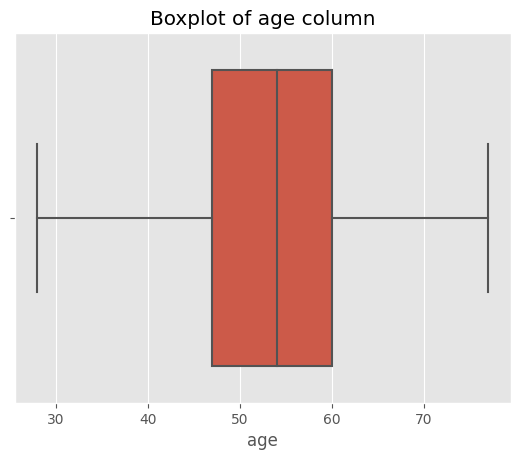

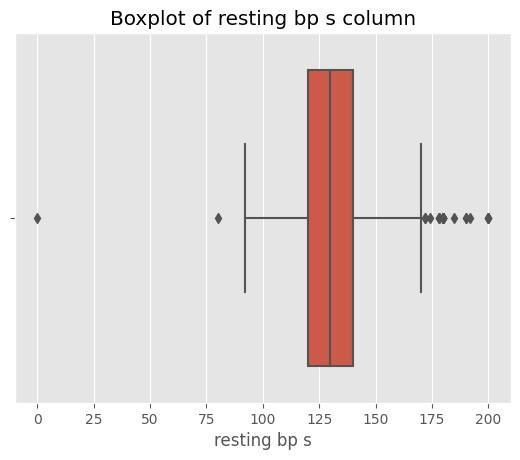

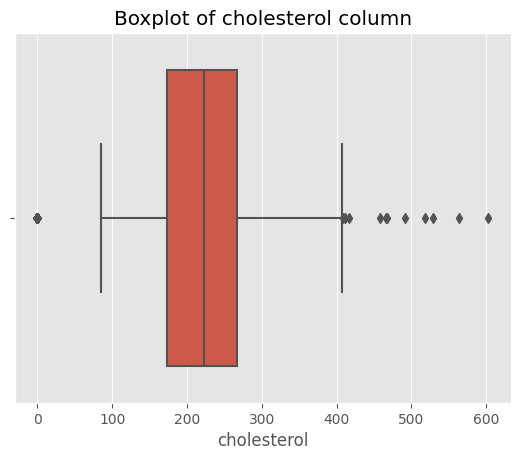

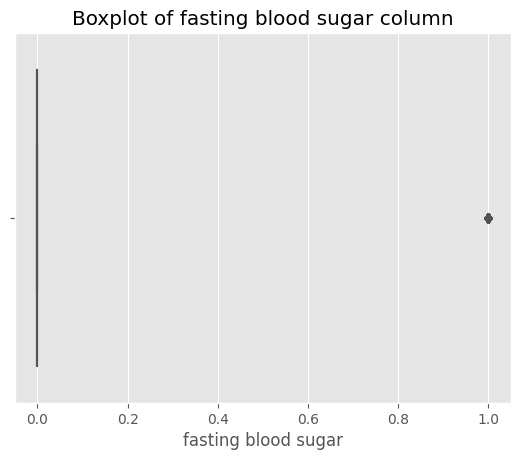

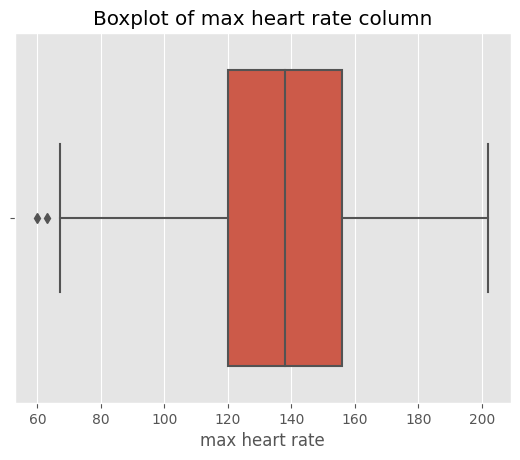

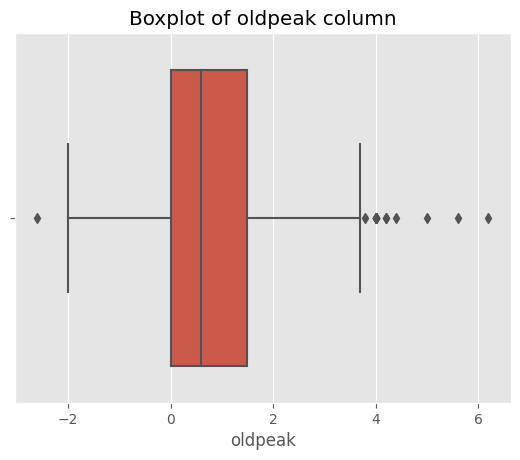

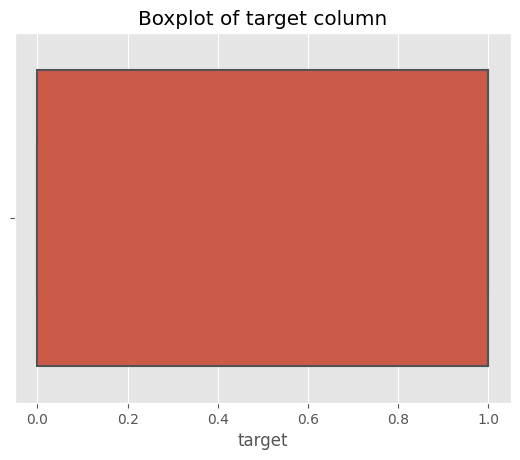

In [26]:
# making boxplot for numerical columns to detect outliers
plt.style.use("ggplot")
for col in num_col:
    sns.boxplot(x=col,data=df)
    plt.title("Boxplot of {} column".format(col))
    plt.show()

In [27]:
# storing columns with outliers in a list
outlier_col = ['resting bp s', 'cholesterol','max heart rate','oldpeak']

In [28]:
# removing outliers from the columns in which outliers
for col_name in outlier_col:
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df.loc[(df[col_name] > fence_low) & (df[col_name] < fence_high)]


In [29]:
# Blood pressure and Cholesterol cannot be zero so taking values greater than zero
df_out = df_out.loc[df['resting bp s'] > 0]
df_out = df_out.loc[df["cholesterol"] > 0]

In [30]:
print("Shape of original dataframe {}".format(df.shape))
print("Shape of cleaned dataframe {}".format(df_out.shape))

Shape of original dataframe (918, 12)

Shape of cleaned dataframe (731, 12)


# Data Analysis & Visualization


# Univariate Analysis

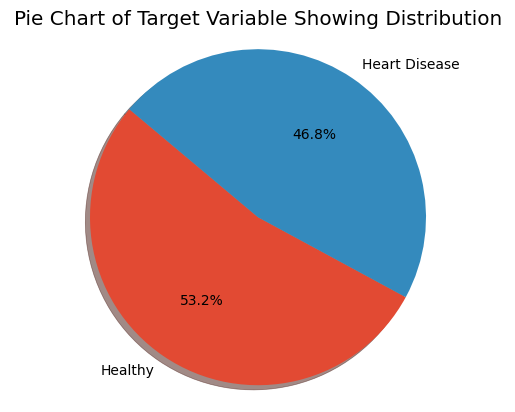

In [31]:
# making pie chart
labels=["Healthy","Heart Disease"]

healthy_or_not = df_out['target'].value_counts().tolist()
values = [healthy_or_not[0], healthy_or_not[1]]

#plt.figure(figsize=(8,6))
plt.pie(values, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Pie Chart of Target Variable Showing Distribution")
plt.show()


- The dataset contain 53.2% healthy people and 46.8% of people suffering from heart disease

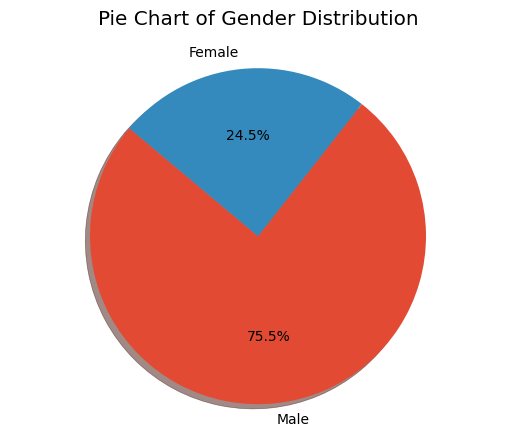

In [32]:
# making a pie chart for sex variable distribution
gender_dist = df_out['sex'].value_counts()

#plt.figure(figsize=(8,6))
plt.pie(gender_dist.values, labels=["Male","Female"],
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Pie Chart of Gender Distribution",y=1.05)
plt.show()


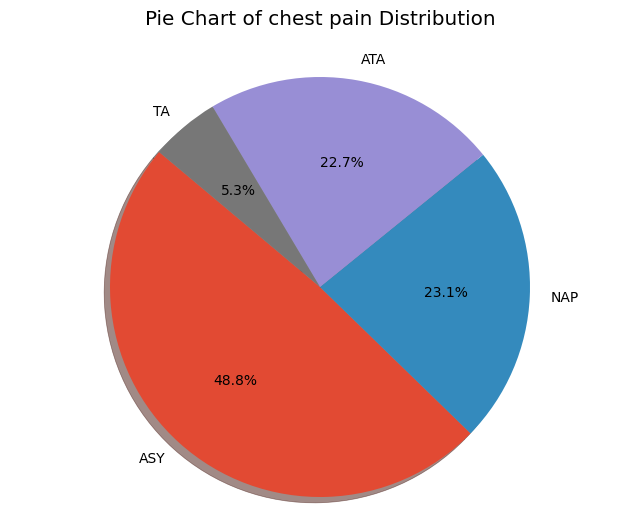

In [33]:
# making a pie chart for chest pain type variable distribution
chest_dist = df_out['chest pain type'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(chest_dist.values, labels=chest_dist.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Pie Chart of chest pain Distribution",y=1.05)
plt.show()


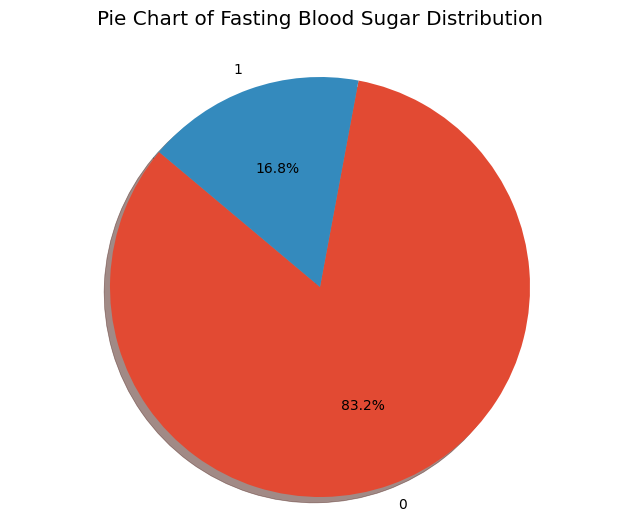

In [34]:
# making a pie chart for fasting blood sugar variable distribution
blood_sugar_dist = df_out['fasting blood sugar'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(blood_sugar_dist.values, labels=blood_sugar_dist.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Pie Chart of Fasting Blood Sugar Distribution",y=1.05)
plt.show()

- The above pie chart shows distribution of blood sugar level during dasting. 1 means if blood sugar was greater than 120mg/dl and 0 means less than 120 mg/dl.

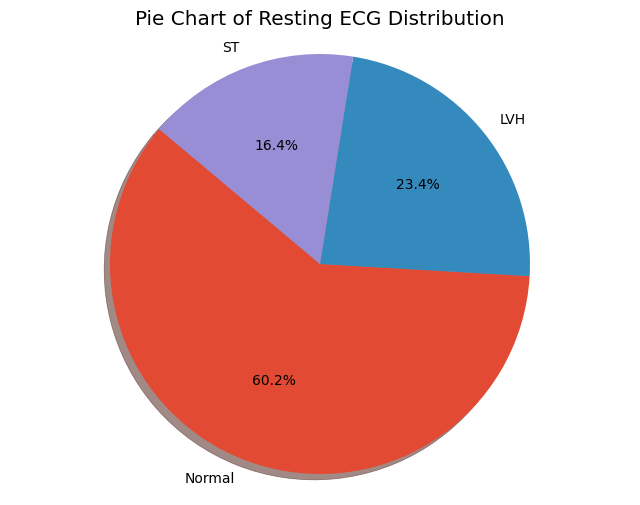

In [35]:
# making a pie chart for resting ecg variable distribution
resting_ecg_dist = df_out['resting ecg'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(resting_ecg_dist.values, labels=resting_ecg_dist.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Pie Chart of Resting ECG Distribution")
plt.show()

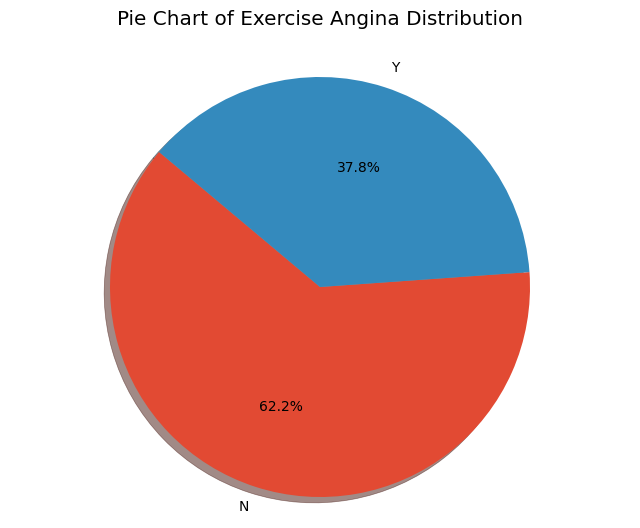

In [36]:
# making a pie chart for exercise angina variable distribution
exercise_angina_dist = df_out['exercise angina'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(exercise_angina_dist.values, labels=exercise_angina_dist.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Pie Chart of Exercise Angina Distribution",y=1.05)
plt.show()

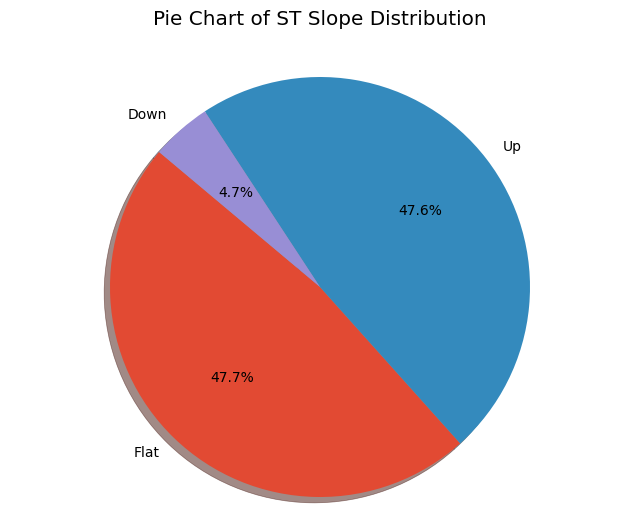

In [37]:
# making a pie chart for st slope variable distribution
st_slop_dist = df_out['ST slope'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(st_slop_dist.values, labels=st_slop_dist.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Pie Chart of ST Slope Distribution",y=1.05)
plt.show()

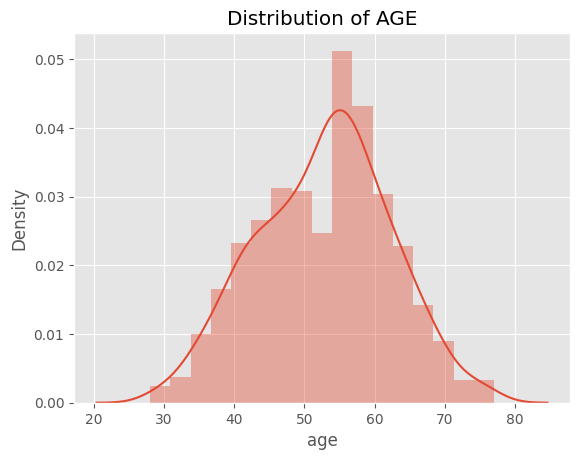

In [38]:
# making histogram for age variable
plt.style.use("ggplot")
sns.distplot(df_out["age"])
plt.title("Distribution of AGE")
plt.show()

- The age variable seem to follow a normal distribution, the dataset seem to include people from age 28 upto 75.

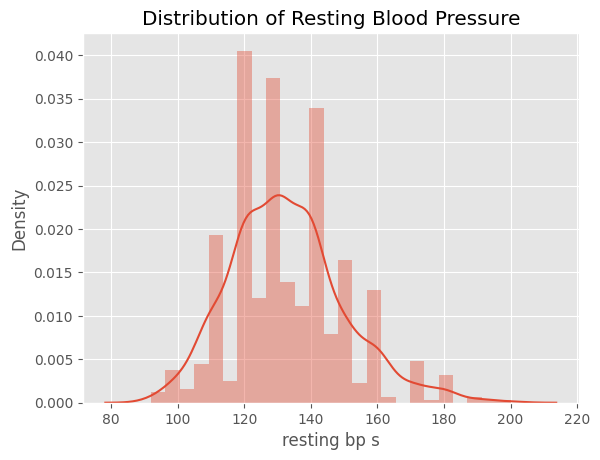

In [39]:
# making histogram for resting blood pressure variable
plt.style.use("ggplot")
sns.distplot(df_out["resting bp s"])
plt.title("Distribution of Resting Blood Pressure")
plt.show()

- The histogram of Resting Blood Pressure shows that this variable also follows normal distribution with a little skewness to the right.

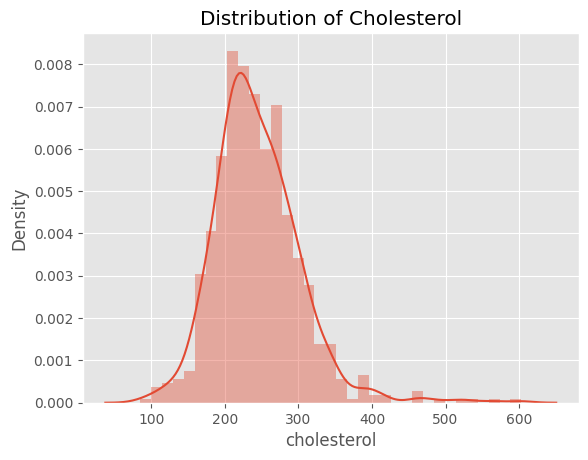

In [40]:
# making histogram for cholesterol variable
plt.style.use("ggplot")
sns.distplot(df_out["cholesterol"])
plt.title("Distribution of Cholesterol")
plt.show()

- The histogram of cholesterol seem to have normal distribution with a right tail skewing to the right. The range of cholesterol seem to be 90 to 600.

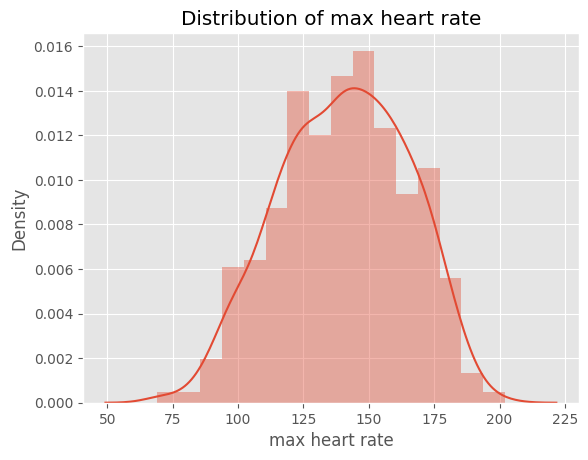

In [41]:
# making histogram for max heart rate variable
plt.style.use("ggplot")
sns.distplot(df_out["max heart rate"])
plt.title("Distribution of max heart rate")
plt.show()

- The histogram of max heart rate variable also seem to follow a normal distribution with a little skewness of left tail to the left

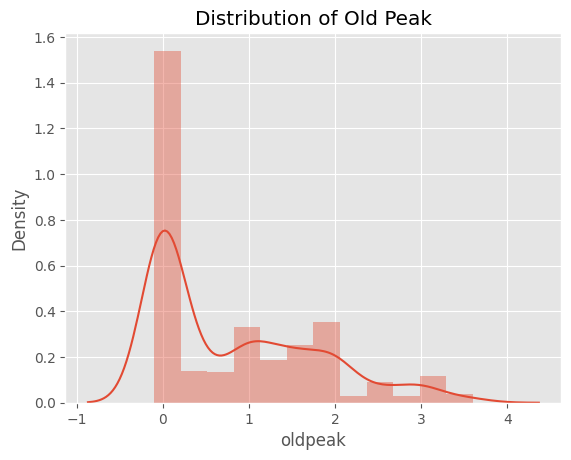

In [42]:
# making histogram for Old peak variable
plt.style.use("ggplot")
sns.distplot(df_out["oldpeak"])
plt.title("Distribution of Old Peak")
plt.show()

- The old peak varibale does not seem to follow a normal distribution.

# Multivariate Analysis


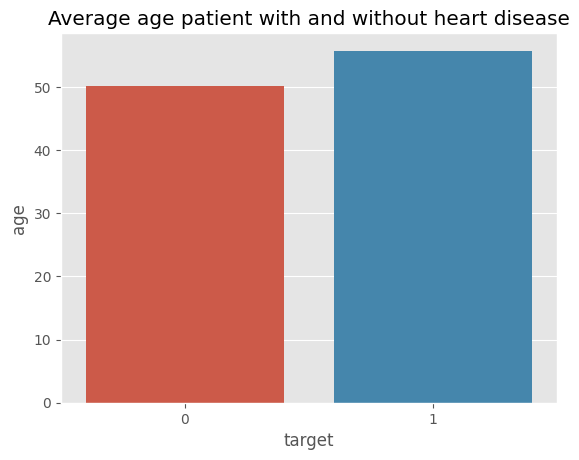

In [43]:
# average age of people with heart disease and healthy people
#plt.figure(figsize=(6,4))
sns.barplot(x="target",y="age",data=df_out,ci=False)
plt.title("Average age patient with and without heart disease")
plt.show()

- The bar chat shows that the average age of people suffering from heart disease is greater than people that do not get heart disease. We can test this by using hypothesis testing

# T-test
- A t test is a statistical test that is used to compare the means of two groups. This test tells whether the two groups are different or not.

- Null Hypothesis: There is no difference in the age of people with and without heart disease.

- Alternative Hypothesis: There is difference in the age of patient with and without heart disease. The average age of people having heart disease is greater than those that do not have heart diseae

- significance level or alpha level use is 5% or 0.05.

In [44]:
# applying t-test to determine if significance difference in means of patient with disease and without disease
disease_group = df_out[df_out["target"] == 1]["age"]
healthy_group = df_out[df_out["target"] == 0]["age"]

# applying t-test and using alternative to greater
stat,p = ttest_ind(disease_group,healthy_group,alternative='greater')
if p > 0.05:
    print("The p-value is greater than 0.05, so we cannot reject the null hypothesis. There is no difference in the age of patient with and without heart disease.")
else:
    print("The p-value is less than 0.05, so we can reject the null hypothesis. There is difference in the age of patient with and without heart disease.  The average age of people suffering from heart disease is greater than other people that do not have heart disease")

The p-value is less than 0.05, so we can reject the null hypothesis. There is difference in the age of patient with and without heart disease.  The average age of people suffering from heart disease is greater than other people that do not have heart disease


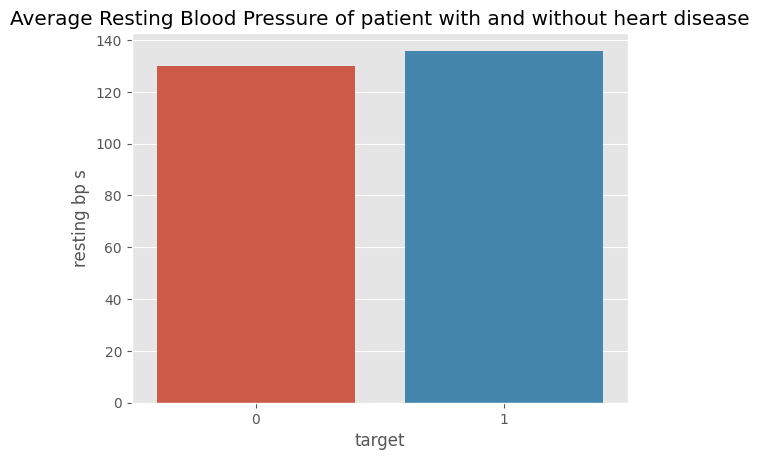

In [45]:
# average resting blood pressure of people getting heart disease and those without hear disease
sns.barplot(x="target",y="resting bp s",data=df_out,ci=False)
plt.title("Average Resting Blood Pressure of patient with and without heart disease")
plt.show()

- There seem to be but not much difference in the average resting blood pressure of patient with and without disease

# T-test
- A t test is a statistical test that is used to compare the means of two groups. This test tells whether the two groups are different or not.

- Null Hypothesis: There is no difference in the resting blood pressure of patient with and without heart disease.

- Alternative Hypothesis: There is difference in the resting blood pressure of patient with and without heart disease. The average resting blood pressure of heart disease patient is greater than the average resting blood pressure of people without heart disease.

- significance level or alpha level use is 5% or 0.05.

In [46]:
# applying t-test to determine if the cholesterol level in patient with and without disease is differenct
restingbp_disease = df_out[df_out["target"] == 1]["resting bp s"]
restingbp_healthy = df_out[df_out["target"] == 0]["resting bp s"]

stat,p = ttest_ind(restingbp_disease,restingbp_healthy,alternative="greater")
if p > 0.05:
    print("The p-value is greater than 0.05, so we cannot reject the null hypothesis. There is no difference in the Cholesterol Level of patient with and without heart disease.")
else:
    print("The p-value is less than 0.05, so we can reject the null hypothesis. There is difference in the Cholesterol Level of patient with and without heart disease.The average cholesterol level of heart disease patient is greater than the average cholesterol level of people withou heart disease.")

The p-value is less than 0.05, so we can reject the null hypothesis. There is difference in the Cholesterol Level of patient with and without heart disease.The average cholesterol level of heart disease patient is greater than the average cholesterol level of people withou heart disease.


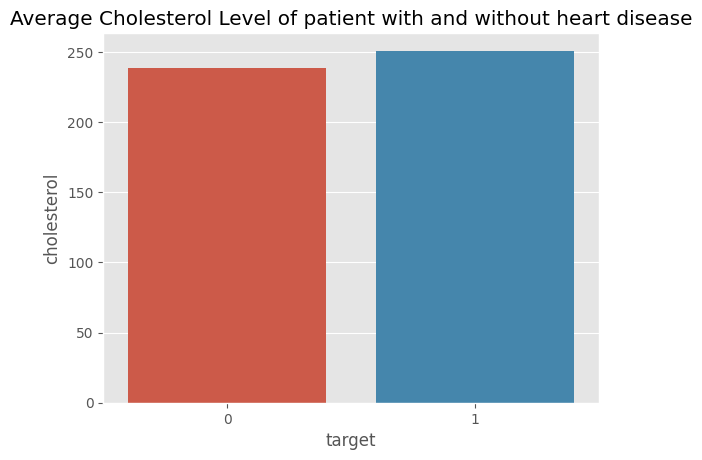

In [47]:
# average resting blood pressur of people getting heart disease and those who do not
sns.barplot(x="target",y="cholesterol",data=df_out,ci=False)
plt.title("Average Cholesterol Level of patient with and without heart disease")
plt.show()

# T-test
- A t test is a statistical test that is used to compare the means of two groups. This test tells whether the two groups are different or not.

- Null Hypothesis: There is no difference in the cholesterol level of patient with and without heart disease.

- Alternative Hypothesis: There is difference in the cholesterol level of patient with and without heart disease. The average cholesterol level of heart disease patient is greater than the average cholesterol level of people withou heart disease.

- significance level or alpha level use is 5% or 0.05.

In [48]:
# applying t-test to determine if the cholesterol level in patient with and without disease is differenct
cholesterol_disease = df_out[df_out["target"] == 1]["cholesterol"]
cholesterol_healthy = df_out[df_out["target"] == 0]["cholesterol"]

stat,p = ttest_ind(cholesterol_disease,cholesterol_healthy,alternative="greater")
if p > 0.05:
    print("The p-value is greater than 0.05, so we cannot reject the null hypothesis. There is no difference in the resting blood pressure of patient with and without heart disease.")
else:
    print("The p-value is less than 0.05, so we can reject the null hypothesis. There is difference in the resting blood pressure of patient with and without heart disease.The average resting blood pressure of heart disease patient is greater than the average resting blood pressure of people withou heart disease.")

The p-value is less than 0.05, so we can reject the null hypothesis. There is difference in the resting blood pressure of patient with and without heart disease.The average resting blood pressure of heart disease patient is greater than the average resting blood pressure of people withou heart disease.


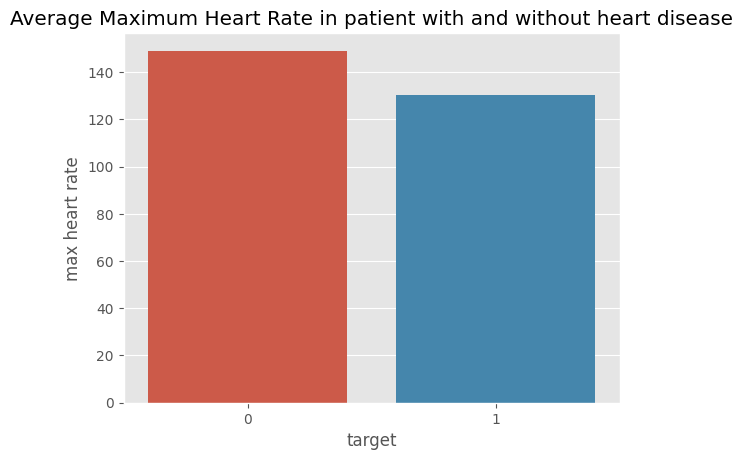

In [49]:
# average resting blood pressur of people getting heart disease and those who do not
sns.barplot(x="target",y='max heart rate',data=df_out,ci=False)
plt.title("Average Maximum Heart Rate in patient with and without heart disease")
plt.show()

- There seem to be a difference in the average maximum heart rate of people suffering from heart disease and healthy people. Healthy people seem to have greater average maximum heart rate than disease people

# T-test
- A t test is a statistical test that is used to compare the means of two groups. This test tells whether the two groups are different or not.

- Null Hypothesis: There is no difference in the average maximum heart rate between people with heart disease and healthy people.

- Alternative Hypothesis: There is difference in the average maximum heart rate of people with and without heart disease. The average maximum heart rate of heart disease patient less than the average maximum heart rate of people without heart disease.

- significance level or alpha level use is 5% or 0.05.

In [50]:
# applying t-test to determine if the cholesterol level in patient with and without disease is differenct
max_heart_disease = df_out[df_out["target"] == 1]["max heart rate"]
max_heart_healthy = df_out[df_out["target"] == 0]["max heart rate"]

stat,p = ttest_ind(max_heart_disease,max_heart_healthy,alternative="less")
if p > 0.05:
    print("The p-value is greater than 0.05, so we cannot reject the null hypothesis. There is no difference in the average max heart rate of people with and without heart disease.")
else:
    print("The p-value is less than 0.05, so we can reject the null hypothesis. There is difference in the average max heart rate of people with and without heart disease.The average max heart rate of heart disease people is lesser than the average max heart rate of people without heart disease.")

The p-value is less than 0.05, so we can reject the null hypothesis. There is difference in the average max heart rate of people with and without heart disease.The average max heart rate of heart disease people is lesser than the average max heart rate of people without heart disease.


# Chi-square test

- Null Hypothesis: There is no association between gender and heart disease

- Alternative Hypothesis: There is association between gender and heart disease
- significance level or alpha level use is 5% or 0.05.

In [51]:
# create contingency table
contingency_table = pd.crosstab(df_out["sex"], df_out["target"])

# conduct chi-squared test
stat, p, dof, expected = chi2_contingency(contingency_table)

# print results
print("Chi-squared test results:")
print("Statistic: ", stat)
print("p-value: ", p)
print("Degrees of freedom: ", dof)
print("Expected frequencies: ")
print(expected)

# conclusion
print("---------------Result--------------")
if p < 0.05:
  print("We can reject the null hypothesis. There is association between gender and heart disease. In other words, the prevalence of heart disease differs significantly between males and females. ")
else:
  print("We cannot reject the null hypothesis")

Chi-squared test results:

Statistic:  63.551277975964354

p-value:  1.5624621281714707e-15

Degrees of freedom:  1

Expected frequencies: 

[[ 95.25444596  83.74555404]

 [293.74555404 258.25444596]]

---------------Result--------------

We can reject the null hypothesis. There is association between gender and heart disease. In other words, the prevalence of heart disease differs significantly between males and females. 


- To further interpret the results, we can calculate the odds ratio to determine the strength of the association between gender and heart disease. The odds ratio is the ratio of the odds of having heart disease for males to the odds of having heart disease for females.

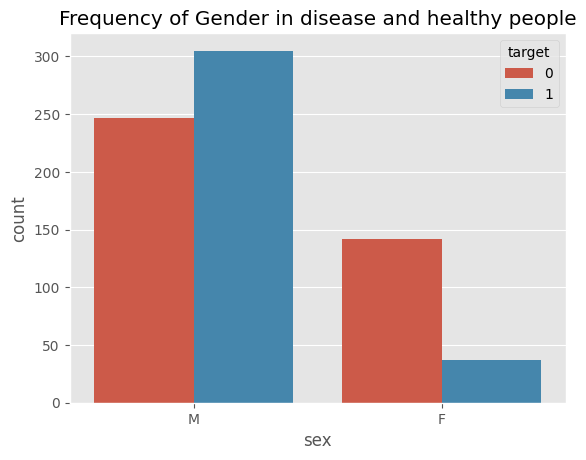

In [52]:
sns.countplot(x="sex",data=df_out,hue="target")
plt.title("Frequency of Gender in disease and healthy people")
plt.show()

# Chi-square test

- Null Hypothesis: There is no association between chest pain type and heart disease

- Alternative Hypothesis: There is association between chest pain type and heart disease
- significance level or alpha level use is 5% or 0.05.

In [53]:
# Create a contingency table
cont_table = pd.crosstab(df['chest pain type'], df['target'])

# Perform the chi-square test
chi2, pval, dof, expected = chi2_contingency(cont_table)

# Print the results
print('Chi-Square Statistic:', chi2)
print('p-value:', pval)
print('Degrees of Freedom:', dof)
print('Expected Frequencies:', expected)

# conclusion
print("---------------Result--------------")
if p < 0.05:
  print("We can reject the null hypothesis. There is association between chest pain type and heart disease.")
else:
  print("We cannot reject the null hypothesis")



Chi-Square Statistic: 268.06723902181767

p-value: 8.08372842808765e-58

Degrees of Freedom: 3

Expected Frequencies: [[221.52505447 274.47494553]

 [ 77.26579521  95.73420479]

 [ 90.66448802 112.33551198]

 [ 20.54466231  25.45533769]]

---------------Result--------------

We can reject the null hypothesis. There is association between chest pain type and heart disease.


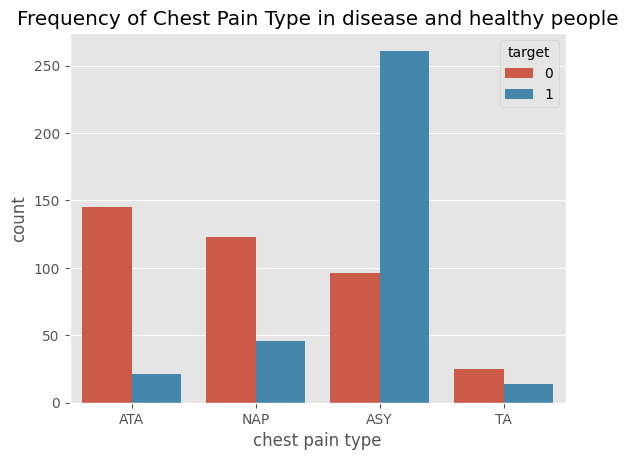

In [54]:
sns.countplot(x="chest pain type",data=df_out,hue="target")
plt.title("Frequency of Chest Pain Type in disease and healthy people")
plt.show()

# Chi-square test

- Null Hypothesis: There is no association between resting ECG and heart disease

- Alternative Hypothesis: There is association between resting ECG and heart disease
- significance level or alpha level use is 5% or 0.05.

In [55]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [56]:
# Create a contingency table
cont_table = pd.crosstab(df['resting ecg'], df['target'])

# Perform the chi-square test
chi2, pval, dof, expected = chi2_contingency(cont_table)

# Print the results
print('Chi-Square Statistic:', chi2)
print('p-value:', pval)
print('Degrees of Freedom:', dof)
print('Expected Frequencies:', expected)

# conclusion
print("---------------Result--------------")
if p < 0.05:
  print("We can reject the null hypothesis. There is association between resting ecg and heart disease.")
else:
  print("We cannot reject the null hypothesis")



Chi-Square Statistic: 10.931469339140978

p-value: 0.0042292328167544925

Degrees of Freedom: 2

Expected Frequencies: [[ 83.96514161 104.03485839]

 [246.53594771 305.46405229]

 [ 79.49891068  98.50108932]]

---------------Result--------------

We can reject the null hypothesis. There is association between resting ecg and heart disease.


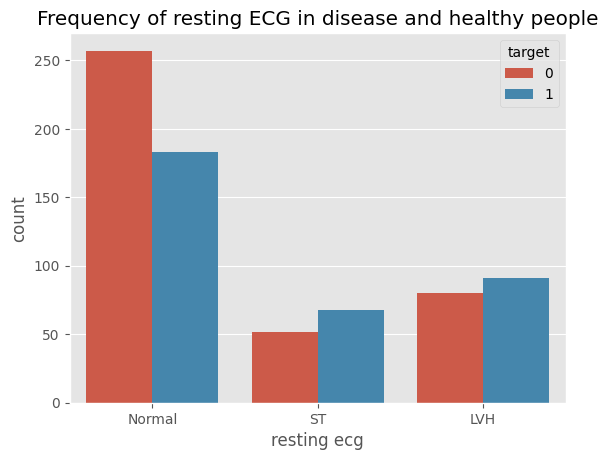

In [57]:
sns.countplot(x="resting ecg",data=df_out,hue="target")
plt.title("Frequency of resting ECG in disease and healthy people")
plt.show()

# Chi-square test

- Null Hypothesis: There is no association between fasting blood sugar and heart disease

- Alternative Hypothesis: There is association between fasting blood sugar and heart disease
- significance level or alpha level use is 5% or 0.05.

In [58]:
# Create a contingency table
cont_table = pd.crosstab(df['fasting blood sugar'], df['target'])

# Perform the chi-square test
chi2, pval, dof, expected = chi2_contingency(cont_table)

# Print the results
print('Chi-Square Statistic:', chi2)
print('p-value:', pval)
print('Degrees of Freedom:', dof)
print('Expected Frequencies:', expected)

# conclusion
print("---------------Result--------------")
if p < 0.05:
  print("We can reject the null hypothesis. There is association between fasting blood sugar and heart disease.")
else:
  print("We cannot reject the null hypothesis")



Chi-Square Statistic: 64.3206790933594

p-value: 1.0573018731809955e-15

Degrees of Freedom: 1

Expected Frequencies: [[314.42265795 389.57734205]

 [ 95.57734205 118.42265795]]

---------------Result--------------

We can reject the null hypothesis. There is association between fasting blood sugar and heart disease.


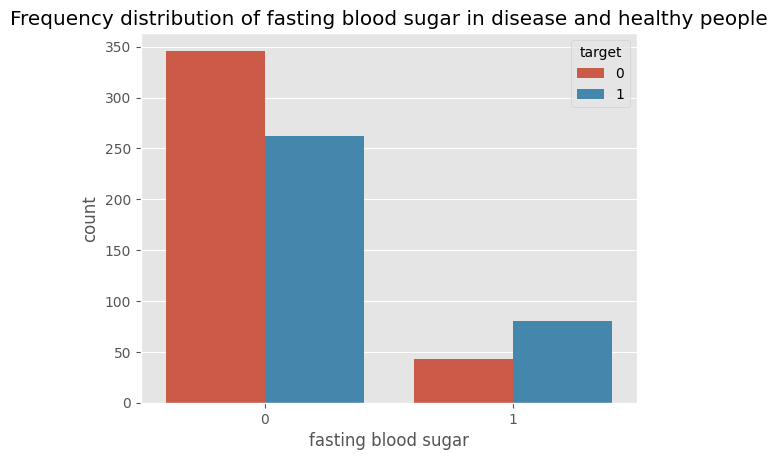

In [59]:
sns.countplot(x='fasting blood sugar',data=df_out,hue="target")
plt.title("Frequency distribution of fasting blood sugar in disease and healthy people")
plt.show()

# Chi-square test

- Null Hypothesis: There is no association between exercise angina and heart disease

- Alternative Hypothesis: There is association between exercise angina and heart disease
- significance level or alpha level use is 5% or 0.05.

In [60]:
# Create a contingency table
cont_table = pd.crosstab(df['exercise angina'], df['target'])

# Perform the chi-square test
chi2, pval, dof, expected = chi2_contingency(cont_table)

# Print the results
print('Chi-Square Statistic:', chi2)
print('p-value:', pval)
print('Degrees of Freedom:', dof)
print('Expected Frequencies:', expected)

# conclusion
print("---------------Result--------------")
if p < 0.05:
  print("We can reject the null hypothesis. There is association between exercise angina and heart disease.")
else:
  print("We cannot reject the null hypothesis")



Chi-Square Statistic: 222.25938271530583

p-value: 2.907808387659878e-50

Degrees of Freedom: 1

Expected Frequencies: [[244.30283224 302.69716776]

 [165.69716776 205.30283224]]

---------------Result--------------

We can reject the null hypothesis. There is association between exercise angina and heart disease.


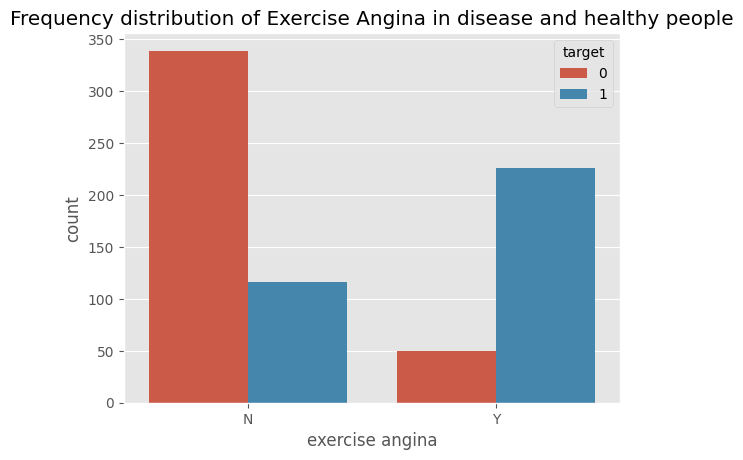

In [61]:
sns.countplot(x='exercise angina',data=df_out,hue="target")
plt.title("Frequency distribution of Exercise Angina in disease and healthy people")
plt.show()

- The bar plot shows that more people that have exercise angina suffer from heart disease and less number of people that do not have exercise angina suffer from heart disease in comparison

# Chi-square test

- Null Hypothesis: There is no association between ST slope and heart disease

- Alternative Hypothesis: There is association between ST slope and heart disease
- significance level or alpha level use is 5% or 0.05.

In [62]:
# Create a contingency table
cont_table = pd.crosstab(df['ST slope'], df['target'])

# Perform the chi-square test
chi2, pval, dof, expected = chi2_contingency(cont_table)

# Print the results
print('Chi-Square Statistic:', chi2)
print('p-value:', pval)
print('Degrees of Freedom:', dof)
print('Expected Frequencies:', expected)

# conclusion
print("---------------Result--------------")
if p < 0.05:
  print("We can reject the null hypothesis. There is association between ST slope and heart disease.")
else:
  print("We cannot reject the null hypothesis")



Chi-Square Statistic: 355.91844319207905

p-value: 5.167637689470128e-78

Degrees of Freedom: 2

Expected Frequencies: [[ 28.1372549   34.8627451 ]

 [205.44662309 254.55337691]

 [176.416122   218.583878  ]]

---------------Result--------------

We can reject the null hypothesis. There is association between ST slope and heart disease.


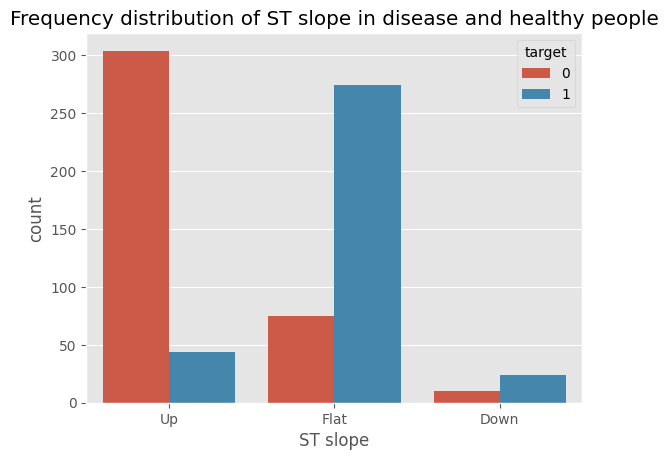

In [63]:
sns.countplot(x='ST slope',data=df_out,hue="target")
plt.title("Frequency distribution of ST slope in disease and healthy people")
plt.show()

- The people suffering from heart disease they have FLat ST slope more often than others

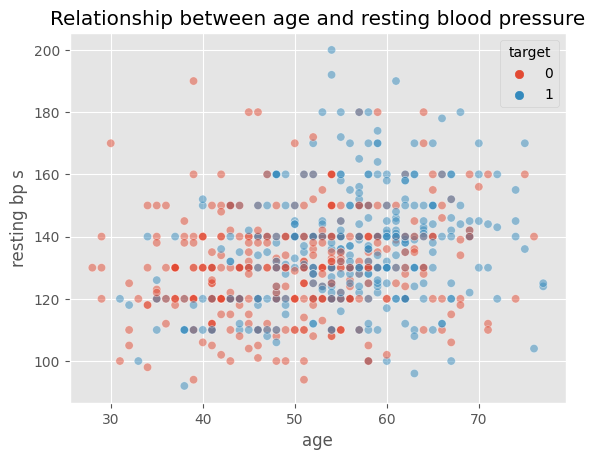

In [64]:
# making a scatterplot to determine relationship between age and resting blood pressure
#plt.figure(figsize=(8,6))
sns.scatterplot(x="age",y="resting bp s",data=df_out,hue="target",alpha=0.5)
plt.title("Relationship between age and resting blood pressure")
plt.show()

- There seem to be a linear relationship but not strong.

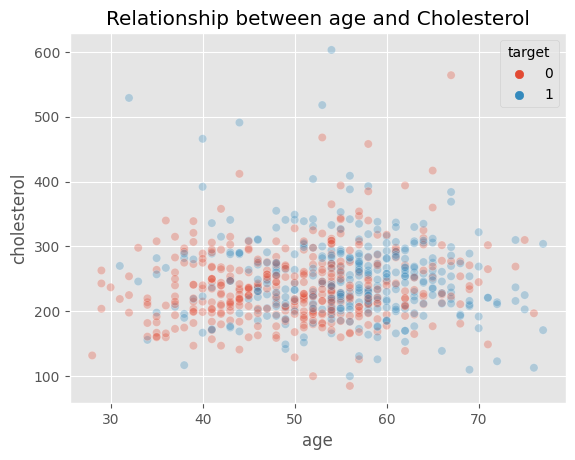

In [65]:
# making a scatterplot to determine relationship between age and Cholesterol Level
#plt.figure(figsize=(8,6))
sns.scatterplot(x="age",y="cholesterol",data=df_out,hue="target",alpha=0.3)
plt.title("Relationship between age and Cholesterol")
plt.show()

- There seem to be some linear relationship but not strong.

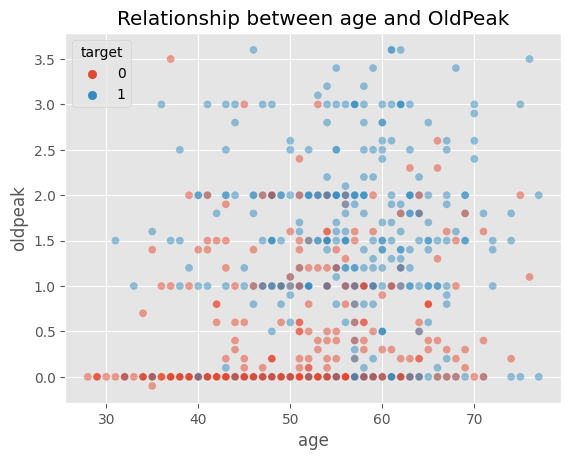

In [66]:
# making a scatterplot to determine relationship between age and Old Peak
sns.scatterplot(x="age",y="oldpeak",data=df_out,hue="target",alpha=0.5)
plt.title("Relationship between age and OldPeak")
plt.show()

- The scatterplot shows that most of the people that do not suffer of heart disease have a oldpeak of 0 and those that suffered from heart disease have some old peak value.

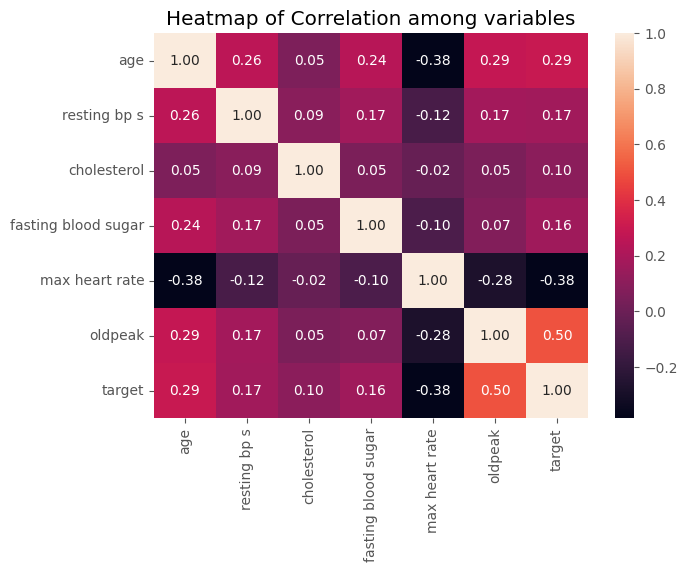

In [67]:
# computing pearson correlation and visualizaing it using heatmap
corr = df_out.corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr,fmt=".2f",annot=True)
plt.title("Heatmap of Correlation among variables")
plt.show()

- A correlation coefficient is a number between -1 and 1 that tells you the strength and direction of a relationship between variables. If correlation of two variables is +1 than they are strongly correlated and have the same direction which means if one is increased the other one also tends to increase and vice verse

# Conclusion of Statistical Analysis
- From the t-test I conducted on numerical variables and the target variable, the average age, resting blood pressure, cholesterol for people with heart disease is greater than the people without heart disease. The average maximum heart rate for people with heart is lower than the people without heart disease.

- From the chi-square test, I explored is there any association between categorical and target varibale. I come to the conclusion that chest pain type, fasting blodd sugar, resting ecg, exercise angina and ST slope all have association with the target variable

# Baseline Accuracy

In [68]:
# determining the most frequent label
baseline_label = df['target'].mode()[0]

# calculating the number of instances that belong to the most frequent label
num_baseline = len(df[df['target'] == baseline_label])

# calculating the baseline accuracy
baseline_accuracy = num_baseline / len(df)

print("Baseline label:", baseline_label)
print("Baseline accuracy:", baseline_accuracy)

Baseline label: 1

Baseline accuracy: 0.5533769063180828


# Data Preparation For Machine Learning

In [69]:
# splitting data into features and target variable
X = df_out.copy()
X.drop("target",axis=1,inplace=True)
y = df_out[["target"]]

In [70]:
# getting dummies for categorical variables
X_dummy = pd.get_dummies(X)

In [71]:
# scaling the features
X_scaled = StandardScaler().fit_transform(X_dummy)

In [72]:
# using smote to make the target class balance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [73]:
# splitting data into training and test set
X_train,X_test,y_train,y_test = train_test_split(X_resampled, y_resampled,test_size=0.2,random_state=21)

# Machine Learning
# The machine learning models used are:
- K-nearest neighbors
- Decision Tree Classifier
- Random Forest Classifier
- Gradient Boosting Classifier
- Support Vector Classifier
- Logistic Regression
- Naive Bayes
- Ada Boost
- Stochastic Gradient Boosting

# Evaluation metrics used are:
- Accuracy score
- Classification Report
- Confusion Matrix

# Accuracy:
- Accuracy is a common evaluation metric used in classification problems to measure the percentage of correctly predicted instances relative to the total number of instances. It is calculated as the ratio between the number of correct predictions and the total number of predictions. A high accuracy value indicates good performance of the model in predicting the correct class labels. However, this metric may not be appropriate for unbalanced datasets where the distribution of classes is not uniform.


# Classification Report:
- A classification report is a performance evaluation metric used in machine learning to evaluate the quality of a classification model. It summarizes the precision, recall, F1 score, and support for each class in the classification task. The report provides information on how well the model performs for different classes and how good the balance is between precision and recall.

- Precision: Precision is the ratio of true positives to the sum of true positives and false positives. It measures the proportion of correctly identified positive instances to all instances predicted as positive by the model. If a model reports a precision of 0.8 for class 1, it means that when it predicts class 1, it is 80% confident that this observation belongs to that class 1.

- Recall: Recall is the ratio of true positive predictions to the sum of true positive and false negative predictions. It measures the proportion of positive instances that were correctly detected by the model. A high hit ratio means that the model can identify the most positive instances.

- F1 score: The F1 score is the harmonic mean of Precision and Recall. It is a balanced metric that considers both precision and recall. It provides a single value that summarizes a model's performance in both metrics. A high F1 value means that the model has high precision and high recall, indicating good overall performance.


# Confusion Matrix:
- A confusion matrix is a performance evaluation metric that shows the number of true positives, false positives, true negatives, and false negatives for each class in a classification problem. It provides a way to evaluate the performance of a classification model by comparing the predicted and true class labels. The confusion matrix tells us where the model is confused and which class label is confused with other class labels. By analyzing the confusion matrix, we can improve the model by adding more instances of a particular class label, etc.


# Selection of a machine learning model
- Selecting a machine learning model is a hectic task. The main idea listed in the Hands On Machine Learning book is that we apply a set of algorithms with default hyperparameters to the dataset and select the algorithm(s) with the highest performance and then perform grid search to find the best parameters for the best model(s).

In [74]:
# ### Applying cross validation of 5 folds with all the models with default parameters
knn = KNeighborsClassifier(n_neighbors=2)
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
lgc = LogisticRegression()
svc = SVC()
nbc = GaussianNB()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
sgc = SGDClassifier()
models = [knn,dtc,rfc,lgc,svc,nbc,abc,gbc,sgc]
model_names = ["KNearestNeighbor","Decision Tree","Random Forest","Logistic Regression","Support Vector","Naive Bayes","Ada Boost","Gradient Boosting","Stochastic Gradient"]
mean_score = []

for model,name in zip(models,model_names):
    cross_score = cross_val_score(model,X_train,y_train,cv=5)
    print("Cross validation scores for {} model is {}".format(name,cross_score))
    average_score = np.mean(cross_score)
    mean_score.append(average_score)
    print("-" * 100)

Cross validation scores for KNearestNeighbor model is [0.776      0.84       0.83870968 0.86290323 0.78225806]

----------------------------------------------------------------------------------------------------

Cross validation scores for Decision Tree model is [0.808      0.856      0.83870968 0.81451613 0.78225806]

----------------------------------------------------------------------------------------------------

Cross validation scores for Random Forest model is [0.856      0.896      0.88709677 0.90322581 0.84677419]

----------------------------------------------------------------------------------------------------

Cross validation scores for Logistic Regression model is [0.808      0.88       0.85483871 0.88709677 0.84677419]

----------------------------------------------------------------------------------------------------

Cross validation scores for Support Vector model is [0.832      0.888      0.85483871 0.91129032 0.84677419]

-------------------------------------

- Cross validation is done to see if models are overfitting or underfitting. It is interpreted from a large difference in accuracy on different test sets.

- In our case KNN and stochastic gradient is underfittng. All other models are good models there is differnce in accuracy of folds but it is not very big

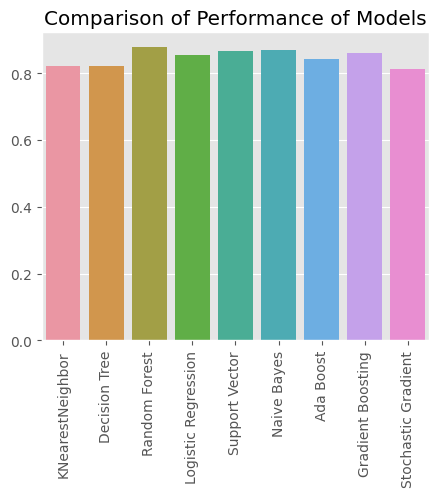

In [75]:
# plotting bar chart to compare the model performances and pointing out the best one
plt.figure(figsize=(5,4))
sns.barplot(x = model_names, y = mean_score)
plt.title("Comparison of Performance of Models")
plt.xticks(rotation=90)
plt.show()

In [76]:
models_performance = pd.DataFrame({"Models":model_names,"Mean Accuracy on five folds":mean_score})

In [77]:
models_performance.sort_values("Mean Accuracy on five folds",ascending=False)

,Models,Mean Accuracy on five folds
2,Random Forest,0.877819
5,Naive Bayes,0.868245
4,Support Vector,0.866581
7,Gradient Boosting,0.860116
3,Logistic Regression,0.855342
6,Ada Boost,0.842452
0,KNearestNeighbor,0.819974
1,Decision Tree,0.819897
8,Stochastic Gradient,0.813432


- I will chose top 5 performing models and will evaluate them on the testing set to see their performance. These models are Random Forest, Naive Bayes, Logistic Regression, Gradient Boosting and Ada Boost.

# Random Forest

In [78]:
# initiating the model
rfc = RandomForestClassifier(random_state=21)

# fitting the model
rfc.fit(X_train,y_train)

# getting prediciton on the testing set
y_pred_rfc = rfc.predict(X_test)

# computing the accuracy score
score_rfc = metrics.accuracy_score(y_test,y_pred_rfc)

print("Accuracy Score of Random Forest on the testing set is {}".format(score_rfc))

Accuracy Score of Random Forest on the testing set is 0.8717948717948718


In [79]:
# computing classification report
report_rfc = metrics.classification_report(y_test,y_pred_rfc)
print("Classification Report of RFC")
print(report_rfc)

Classification Report of RFC

              precision    recall  f1-score   support



           0       0.90      0.86      0.88        85

           1       0.84      0.89      0.86        71



    accuracy                           0.87       156

   macro avg       0.87      0.87      0.87       156

weighted avg       0.87      0.87      0.87       156




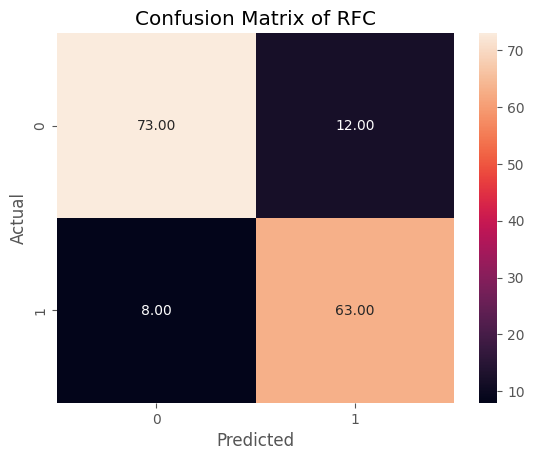

In [80]:
# computing confuion matrix
matrix_rfc = metrics.confusion_matrix(y_test,y_pred_rfc)

# visualizing confusion matrix using heatmap
sns.heatmap(matrix_rfc,annot=True,fmt=".2f")
plt.title("Confusion Matrix of RFC")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

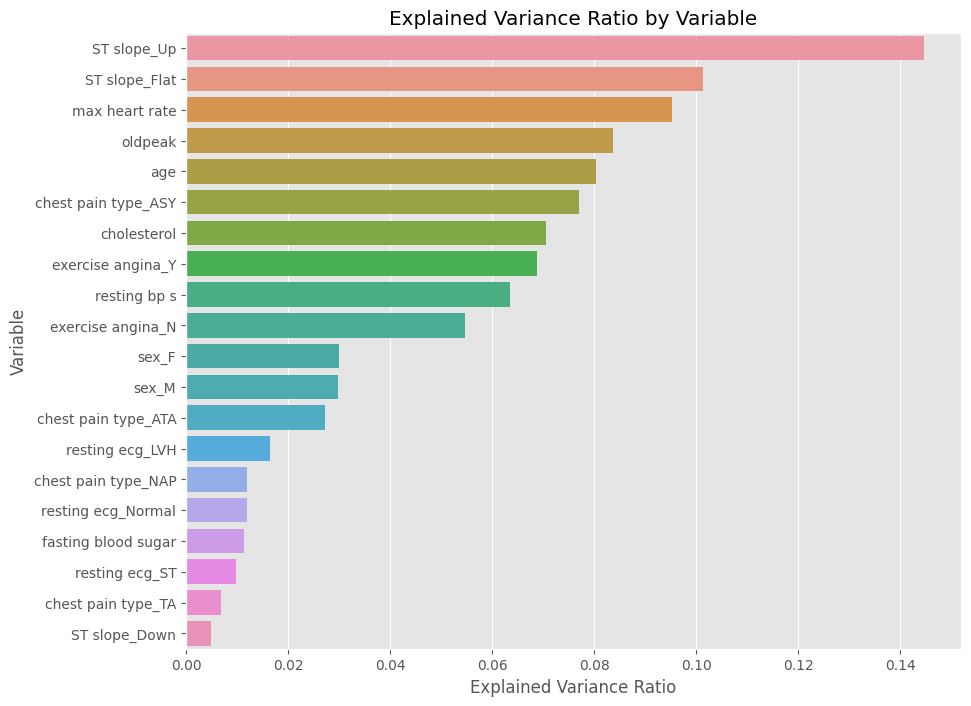

In [81]:
# extracting the explained variance ratio of each feature from the random forest
explained_variance_ratio = rfc.feature_importances_

# creating a dataframe with the feature names and explained variance ratio
df_var = pd.DataFrame({'Variable': X_dummy.columns, 'Explained Variance Ratio': explained_variance_ratio})

# plotting the explained variance ratio as a bar chart using seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Explained Variance Ratio', y='Variable', data=df_var.sort_values(by='Explained Variance Ratio', ascending=False))
plt.xlabel('Explained Variance Ratio')
plt.ylabel('Variable')
plt.title('Explained Variance Ratio by Variable')
plt.show()

# Naive Bayes

In [82]:
# initiating the model
nbc = GaussianNB()

# fitting the model
nbc.fit(X_train,y_train)

# getting prediciton on the testing set
y_pred_nbc = nbc.predict(X_test)

# computing the accuracy score
score_nbc = metrics.accuracy_score(y_test,y_pred_nbc)

print("Accuracy Score of Naive Bayes on the testing set is {}".format(score_nbc))

Accuracy Score of Naive Bayes on the testing set is 0.8333333333333334


In [83]:
# computing classification report
report_nbc = metrics.classification_report(y_test,y_pred_nbc)
print("Classification Report of Naive Bayes")
print(report_nbc)

Classification Report of Naive Bayes

              precision    recall  f1-score   support



           0       0.85      0.85      0.85        85

           1       0.82      0.82      0.82        71



    accuracy                           0.83       156

   macro avg       0.83      0.83      0.83       156

weighted avg       0.83      0.83      0.83       156




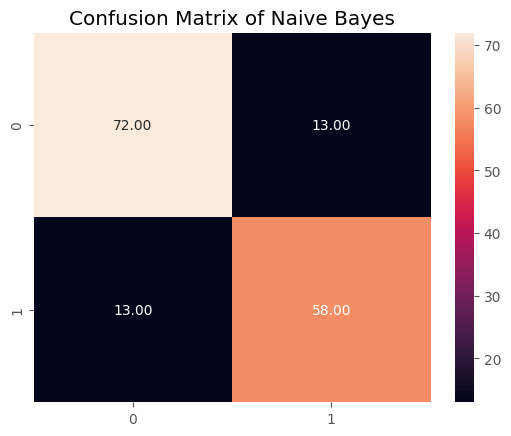

In [84]:
# computing confuion matrix
matrix_nbc = metrics.confusion_matrix(y_test,y_pred_nbc)

# visualizing confusion matrix using heatmap
sns.heatmap(matrix_nbc,annot=True,fmt=".2f")
plt.title("Confusion Matrix of Naive Bayes")
plt.show()

# Support Vector

In [85]:
# initiating the model
svc = SVC()

# fitting the model
svc.fit(X_train,y_train)

# getting prediciton on the testing set
y_pred_svc = svc.predict(X_test)

# computing the accuracy score
score_svc = metrics.accuracy_score(y_test,y_pred_svc)

print("Accuracy Score of Support Vector Classifier on the testing set is {}".format(score_svc))

Accuracy Score of Support Vector Classifier on the testing set is 0.8397435897435898


In [86]:
# computing classification report
report_svc = metrics.classification_report(y_test,y_pred_svc)
print("Classification Report of Support Vector Classifier")
print(report_svc)

Classification Report of Support Vector Classifier

              precision    recall  f1-score   support



           0       0.87      0.84      0.85        85

           1       0.81      0.85      0.83        71



    accuracy                           0.84       156

   macro avg       0.84      0.84      0.84       156

weighted avg       0.84      0.84      0.84       156




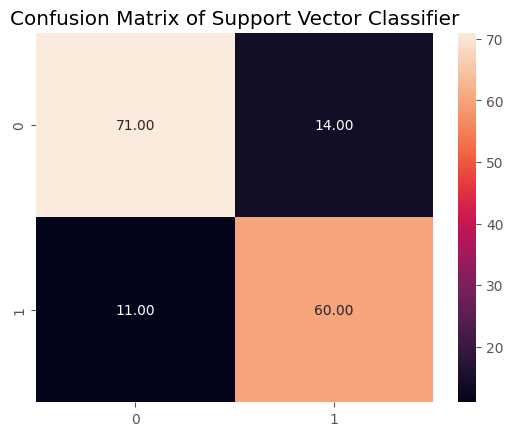

In [87]:
# computing confuion matrix
matrix_svc = metrics.confusion_matrix(y_test,y_pred_svc)

# visualizing confusion matrix using heatmap
sns.heatmap(matrix_svc,annot=True,fmt=".2f")
plt.title("Confusion Matrix of Support Vector Classifier")
plt.show()

# Gradient Boosting

In [88]:
# initiating the model
gbc = GradientBoostingClassifier()

# fitting the model
gbc.fit(X_train,y_train)

# getting prediciton on the testing set
y_pred_gbc = gbc.predict(X_test)

# computing the accuracy score
score_gbc = metrics.accuracy_score(y_test,y_pred_gbc)

print("Accuracy Score of Gradient Boosting Classifier on the testing set is {}".format(score_gbc))

Accuracy Score of Gradient Boosting Classifier on the testing set is 0.8653846153846154


In [89]:
# computing classification report
report_gbc = metrics.classification_report(y_test,y_pred_gbc)
print("Classification Report of Gradient Boosting Classifier")
print(report_gbc)

Classification Report of Gradient Boosting Classifier

              precision    recall  f1-score   support



           0       0.91      0.84      0.87        85

           1       0.82      0.90      0.86        71



    accuracy                           0.87       156

   macro avg       0.87      0.87      0.87       156

weighted avg       0.87      0.87      0.87       156




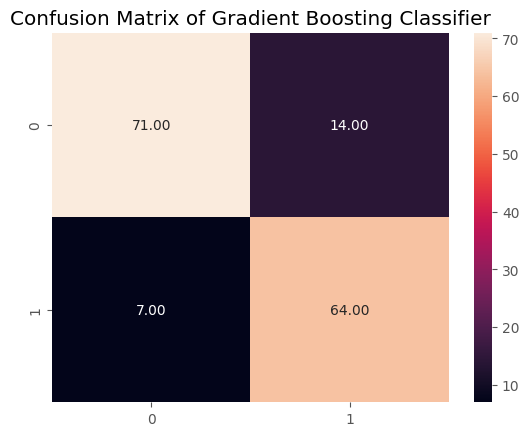

In [90]:
# computing confuion matrix
matrix_gbc = metrics.confusion_matrix(y_test,y_pred_gbc)

# visualizing confusion matrix using heatmap
sns.heatmap(matrix_gbc,annot=True,fmt=".2f")
plt.title("Confusion Matrix of Gradient Boosting Classifier")
plt.show()

In [91]:
# initiating the model
logreg = LogisticRegression()

# fitting the model
logreg.fit(X_train,y_train)

# getting prediciton on the testing set
y_pred_logreg = logreg.predict(X_test)

# computing the accuracy score
score_logreg = metrics.accuracy_score(y_test,y_pred_logreg)

print("Accuracy Score of Logistic Regression on the testing set is {}".format(score_logreg))

Accuracy Score of Logistic Regression on the testing set is 0.8525641025641025


In [92]:
# computing classification report
report_logreg = metrics.classification_report(y_test,y_pred_logreg)
print("Classification Report of Logreg")
print(report_logreg)

Classification Report of Logreg

              precision    recall  f1-score   support



           0       0.88      0.85      0.86        85

           1       0.82      0.86      0.84        71



    accuracy                           0.85       156

   macro avg       0.85      0.85      0.85       156

weighted avg       0.85      0.85      0.85       156




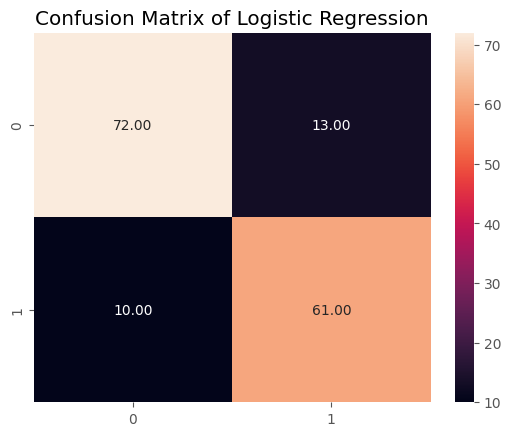

In [93]:
# computing confuion matrix
matrix_logreg = metrics.confusion_matrix(y_test,y_pred_logreg)

# visualizing confusion matrix using heatmap
sns.heatmap(matrix_logreg,annot=True,fmt=".2f")
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

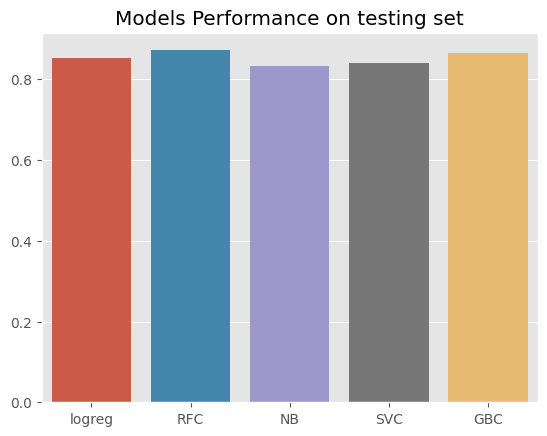

In [94]:
# comparison of models on performance on testing data
models_nam = ["logreg","RFC","NB","SVC","GBC"]

# score
mod_score = [score_logreg,score_rfc,score_nbc,score_svc,score_gbc]

# visualizing a barplot
sns.barplot(x=models_nam,y = mod_score)
plt.title("Models Performance on testing set")
plt.show()

- The random forest and GBC performed well as compared to others on the testing set.

In [95]:
# Defining the individual models to be included in the voting classifier
estimators = [('rf', RandomForestClassifier()),
              ('nb', GaussianNB()),
              ('svc', SVC()),
              ('gb', GradientBoostingClassifier()),
              ('lr', LogisticRegression())]

# Creating the voting classifier
voting_clf = VotingClassifier(estimators=estimators, voting='hard')

# Fitting the voting classifier on the training data
voting_clf.fit(X_train, y_train)

# Predicting on the testing data using the voting classifier
y_pred = voting_clf.predict(X_test)

# Calculating the accuracy of the voting classifier
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Voting Classifier Accuracy:", accuracy)

Voting Classifier Accuracy: 0.8525641025641025


# Hyperparameter Tuning of Random Forest

In [96]:
# Define the Random Forest Classifier model
rfc = RandomForestClassifier(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [97]:
# Performing a grid search with cross-validation
grid_search = GridSearchCV(rfc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [98]:
# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'bootstrap': False, 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Best score: 0.8826064516129032


In [99]:
# evaluating accuracy on test set using the best parameters
rfc_imp = RandomForestClassifier(
    bootstrap = False, max_depth = 15, min_samples_leaf = 2, min_samples_split = 2, n_estimators = 200
)

# fitting the model
rfc_imp.fit(X_train,y_train)

# getting prediciton on the testing set
y_pred_rfc_imp = rfc_imp.predict(X_test)

# computing the accuracy score
score_rfc_imp = metrics.accuracy_score(y_test,y_pred_rfc_imp)

print("Accuracy Score of Random Forest using best parameters from Grid search on the testing set is {}".format(score_rfc_imp))

Accuracy Score of Random Forest using best parameters from Grid search on the testing set is 0.8717948717948718


- The accuracy does not seem to improve, the performance with default parameters is quite similar to the tuned parameters

# **Significance of the Project:**

- **Healthcare Advancements:** Understanding heart diseases through data analysis and machine learning can pave the way for advancements in preventive healthcare strategies.

- **Enhanced Diagnosis and Prediction:** Accurate prediction models derived from this project can assist healthcare professionals in early diagnosis, thus potentially saving lives and improving patient outcomes.

- **Insight into Risk Factors:** Identification of patterns and correlations within the dataset can shed light on significant risk factors contributing to heart diseases, enabling targeted interventions.

- **Informative Insights for Research:** The project's findings and insights can serve as a valuable resource for further medical research in cardiology and related fields.

- **Public Health Impact:** By uncovering critical factors related to heart diseases, the project could contribute to public health initiatives aimed at reducing the prevalence and impact of cardiovascular ailments.

# **Practical Applications:**

- **Predictive Healthcare:** The machine learning models developed in this project can be practically applied in healthcare settings for risk assessment, enabling personalized patient care plans.

- **Clinical Decision Support:** Insights derived from the project can support clinicians in making informed decisions regarding patient care and treatment strategies.

- **Healthcare Resource Allocation:** Understanding the prevalence and factors associated with heart diseases can aid in resource allocation within healthcare systems, directing efforts where they are most needed.

- **Public Awareness and Education:** Findings from this project can contribute to educational materials and awareness campaigns to inform the public about heart disease risk factors and prevention measures.

- **Potential for Early Intervention:** Early detection through predictive models can prompt proactive interventions, potentially reducing the severity and impact of heart diseases.